In [73]:
import matplotlib.pyplot as plt
import numpy as np

In [74]:
def draw_svd_separately(M, xs, ys): 
    # now plot individual transformations
    U,S, Vt = np.linalg.svd(M)

    print(U)
    print(S)
    print(Vt)

    S_mat = np.array([
        [S[0] , 0],
        [0,    S[1]]
    ])

    Vx = np.matmul(Vt, v.T)
    SVx = np.matmul(S_mat, Vx)
    USVx = np.matmul(U, SVx)

    figure, axes = plt.subplots(1)

    axes.scatter(v.T[0], v.T[1], marker='.', c='black')
    axes.scatter(Vx[0], Vx[1], marker='.', c='red')
    axes.scatter(SVx[0], SVx[1], marker='.', c='green')
    axes.scatter(USVx[0], USVx[1], marker='.', c='blue')

    #axes.set_ylim(-2,2)
    #axes.set_xlim(-3,3)

    axes.set_aspect('equal', adjustable='box')

[[-0.59025263 -0.80721858]
 [-0.80721858  0.59025263]]
[7.07720233 1.97818281]
[[-0.73709891 -0.67578487]
 [ 0.67578487 -0.73709891]]


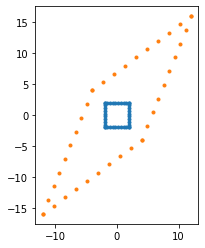

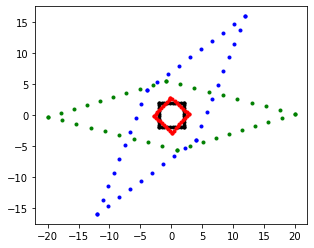

In [75]:
M = np.array([
    [2, 4],
    [5, 3]
])

# For circle
# theta = np.linspace(0, 2*np.pi, 30)
# radius = 0.3
# xs = radius * np.cos(theta)
# ys = radius * np.sin(theta)

# for square 
a = np.linspace(-2,2, num=10)
b = np.array([-2]*10)
xs = np.concatenate([a, a, b, b+4])
ys = np.concatenate([b, b+4, a, a])

figure, axes = plt.subplots(1)
axes.scatter(xs, ys, marker='.')

xs = np.expand_dims(xs, axis=1)
ys = np.expand_dims(ys, axis=1)
v = np.concatenate([xs, ys],axis=1)

transformedVs = np.matmul(M, v.T)
axes.scatter(transformedVs[0], transformedVs[1], marker='.')
axes.set_aspect('equal', adjustable='box')

draw_svd_separately(M, xs, ys)

[[-0.59025263 -0.80721858]
 [-0.80721858  0.59025263]]
[7.07720233 1.97818281]
[[-0.73709891 -0.67578487]
 [ 0.67578487 -0.73709891]]


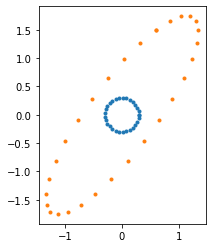

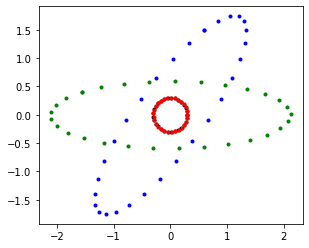

In [76]:
M = np.array([
    [2, 4],
    [5, 3]
])

# For circle
theta = np.linspace(0, 2*np.pi, 30)
radius = 0.3
xs = radius * np.cos(theta)
ys = radius * np.sin(theta)

figure, axes = plt.subplots(1)
axes.scatter(xs, ys, marker='.')

xs = np.expand_dims(xs, axis=1)
ys = np.expand_dims(ys, axis=1)
v = np.concatenate([xs, ys],axis=1)

transformedVs = np.matmul(M, v.T)
axes.scatter(transformedVs[0], transformedVs[1], marker='.')
axes.set_aspect('equal', adjustable='box')

draw_svd_separately(M, xs, ys)

In [5]:
import torch, torchvision
import matplotlib.pyplot as plt

In [2]:
x1 = torch.rand(size=(2,1,64,64))
x2 = torch.rand(size=(2,1,64,64))

In [3]:
x1 = torchvision.utils.make_grid(x1, normalize=True)
x2 = torchvision.utils.make_grid(x2, normalize=True)

print(x1.shape, x2.shape)

torch.Size([3, 68, 134]) torch.Size([3, 68, 134])


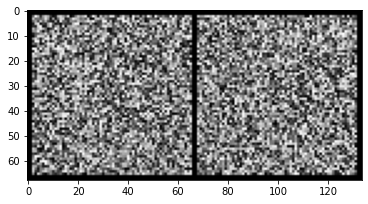

In [6]:
plt.imshow(x1.permute(1, 2, 0)  )

In [7]:
on_channel = torch.ones(size=(1,64,64))
off_channel = torch.zeros(size=(1,64,64))

In [11]:
red_image = torch.cat([on_channel, off_channel, off_channel], dim=0)
green_image = torch.cat([off_channel, on_channel, off_channel], dim=0)
blue_image = torch.cat([off_channel, off_channel, on_channel], dim=0)

x1 = torch.Tensor(size=(3, 3, 64, 64))
x1[0] = red_image
x1[1] = green_image
x1[2] = blue_image

x2 = torch.Tensor(size=(3, 3, 64, 64))
x2[0] = blue_image
x2[1] = red_image
x2[2] = green_image


In [12]:
x1 = torchvision.utils.make_grid(x1, normalize=True)
x2 = torchvision.utils.make_grid(x2, normalize=True)


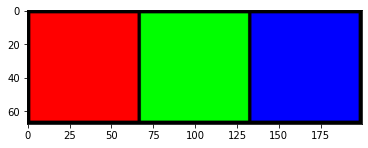

In [13]:
plt.imshow(x1.permute(1, 2, 0))

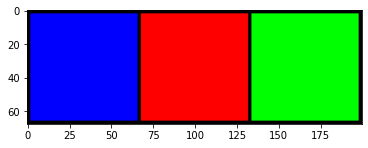

In [14]:
plt.imshow(x2.permute(1, 2, 0))

torch.Size([3, 68, 400])


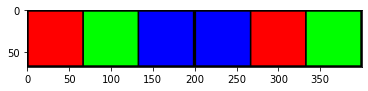

In [16]:
img_compare = torch.cat([x1,x2], dim = 2)
print(img_compare.shape)
plt.imshow(img_compare.permute(1, 2, 0))